In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

In [3]:
data = pd.read_csv('ventes.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(data.shape)
data.columns

(1000, 17)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df = data.drop('Invoice ID', axis = 1)

In [8]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
listDesVilles=df['City'].value_counts()
print(listDesVilles)

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


In [10]:
import numpy as np
# Sélectionnez les colonnes numériques (en excluant la colonne 'Date')
numerical_data = data.select_dtypes(include=[np.number])

# Calculez la corrélation entre les variables
correlation_matrix = numerical_data.corr()

In [11]:
correlation_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


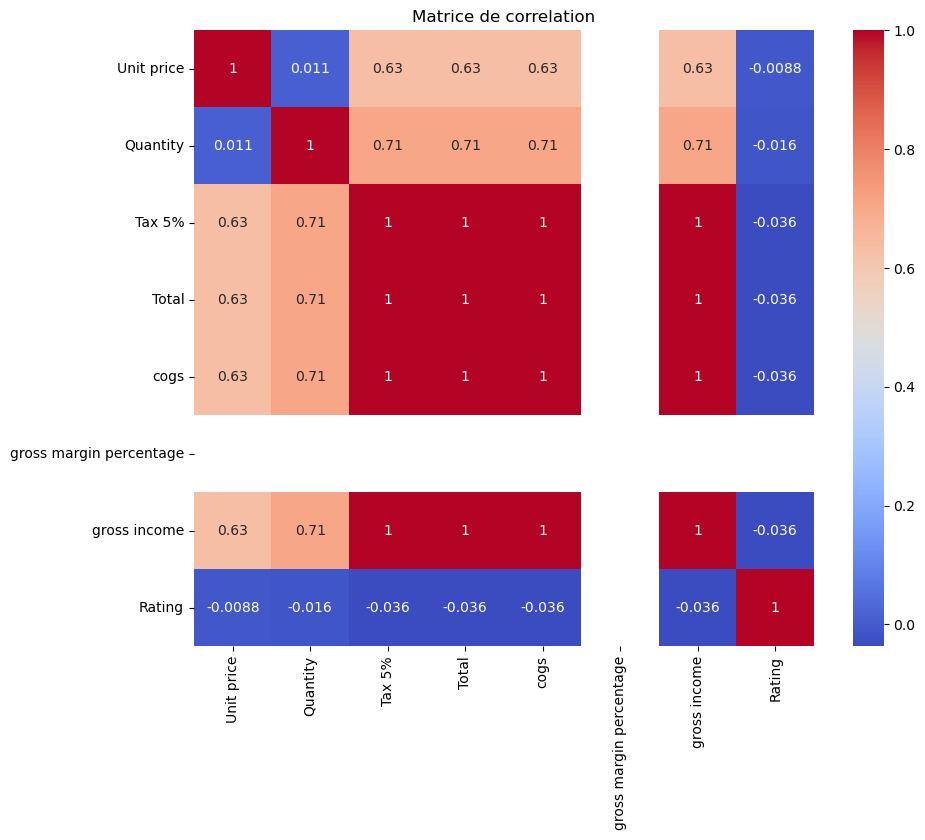

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation')
plt.show()

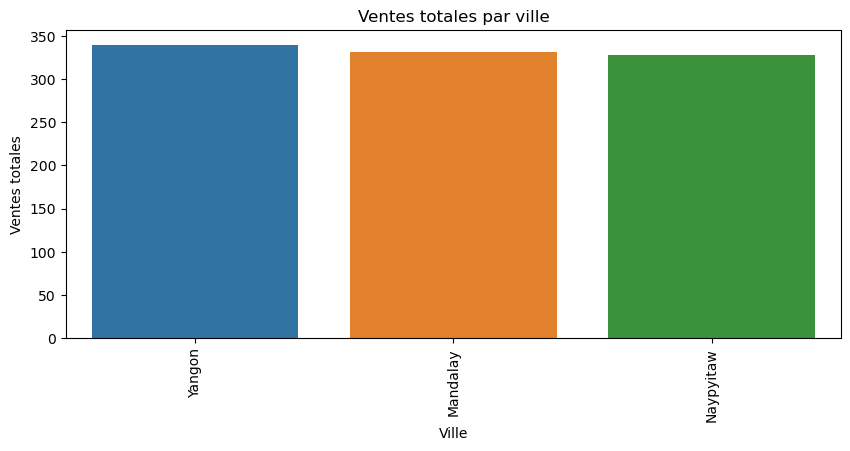

In [66]:
plt.figure(figsize=(10, 4))
sns.barplot(x=listDesVilles.index, y=listDesVilles.values)
plt.title('Ventes totales par ville')
plt.xlabel('Ville')
plt.ylabel('Ventes totales')
plt.xticks(rotation=90)
plt.show()

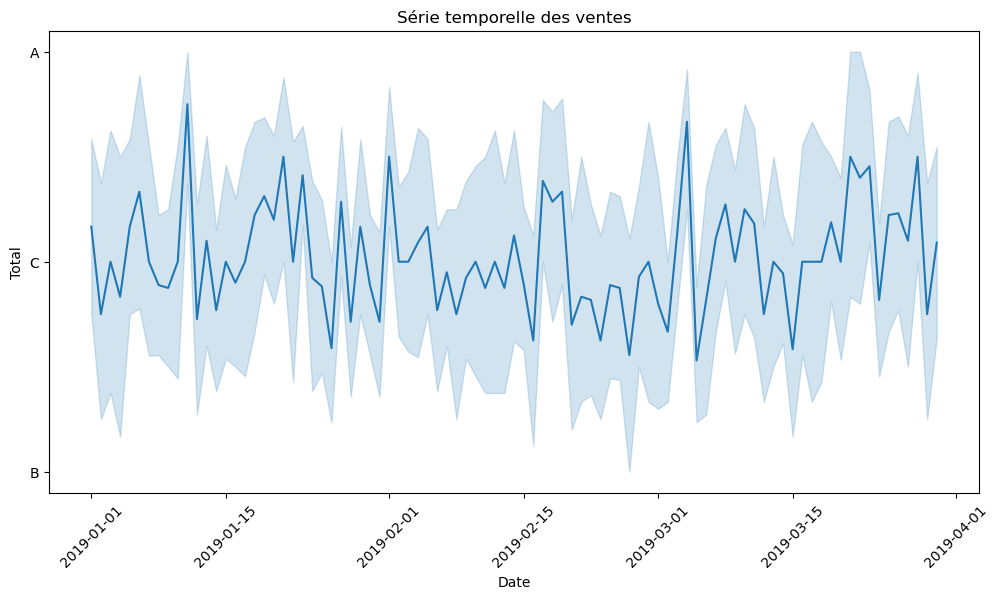

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
# Visualisation de la distribution des ventes au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Branch')
plt.title('Série temporelle des ventes')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()
#A inserer une interactivité par ville

In [15]:
 #Extract the day component from the 'date' column and create a new 'day' column
data['day'] = (data['Date']).dt.day

# Extract the month component from the 'date' column and create a new 'month' column
data['month'] = (data['Date']).dt.month

# Extract the year component from the 'date' column and create a new 'year' column
data['year'] = (data['Date']).dt.year

In [16]:
#Regroupez le DataFrame par la colonne « Branche » et comptez les occurrences de chaque type de client dans la colonne « Total »
df.groupby(['Branch']).agg({'Total': 'count'})

,Total
Branch,
A,340
B,332
C,328


<function matplotlib.pyplot.show(close=None, block=None)>

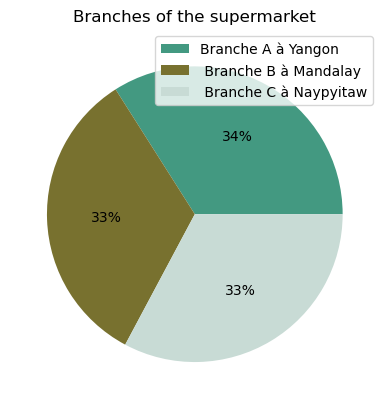

In [17]:
# Définissez les données de branche sous forme de liste avec des décomptes pour chaque branche
branch = [340, 332, 328]

# Définir le rayon du diagramme circulaire
radius = 1.0

# Définir les couleurs pour chaque branche
colors = ["#439981", "#78712f", "#c8dbd5"]

# Afficher les valeurs en pourcentage sur le graphique à secteurs
autopct = "%1.0f%%"
# Créer le diagramme circulaire
plt.pie(branch, radius=radius, colors=colors, autopct=autopct)

# Définir le titre du graphique
plt.title("Branches of the supermarket")

# Ajoutez une légende pour étiqueter chaque branche
plt.legend(labels=["Branche A à Yangon", " Branche B à Mandalay", " Branche C à Naypyitaw"])
plt.show
#Information à vérifier la cohérance

In [18]:
data.groupby(['Gender']).agg({'Total':'count'})

,Total
Gender,
Female,501
Male,499


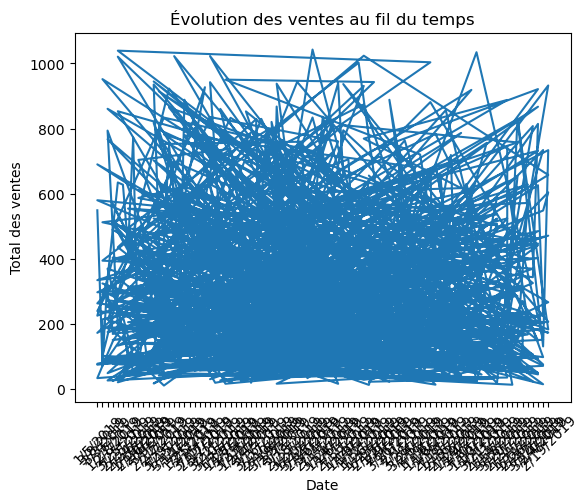

In [19]:
plt.plot(df['Date'], df['Total'])
plt.xlabel('Date')
plt.ylabel('Total des ventes')
plt.title('Évolution des ventes au fil du temps')
plt.xticks(rotation=45)
plt.show()

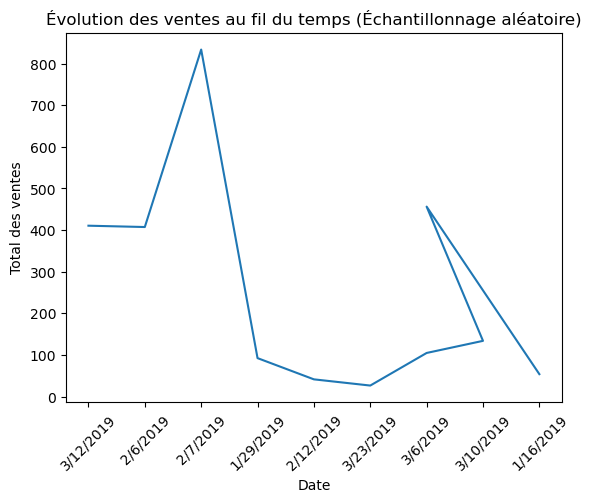

In [20]:
# Échantillonnage aléatoire des données
import random
sample_size = 10  # Nombre de points à afficher
random_indices = random.sample(range(len(df)), sample_size)
df_sampled = df.iloc[random_indices]

# Graphique en ligne avec données échantillonnées
plt.plot(df_sampled['Date'], df_sampled['Total'])
plt.xlabel('Date')
plt.ylabel('Total des ventes')
plt.title('Évolution des ventes au fil du temps (Échantillonnage aléatoire)')
plt.xticks(rotation=45)
plt.show()

In [28]:
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime,date

# Créer des widgets de sélection pour la branche, la ville, la période de temps et la taille de l'échantillon
select_branche = widgets.Dropdown(options= df['Branch'].unique(), description='Branche:')
select_ville = widgets.Dropdown(options=df['City'].unique(), description='Ville:')
start_date_picker = widgets.DatePicker(description='Date de début:', layout=widgets.Layout(width='auto'))
end_date_picker = widgets.DatePicker(description='Date de fin:', layout=widgets.Layout(width='auto'))
select_sample_size = widgets.Select(options=[10,15,20,30, 50, 100], description='Taille de l\'échantillon:')

# Fonction pour mettre à jour le graphique en fonction des sélections
def update_graph(branche, ville, start_date, end_date, sample_size):
    df_filtered = df.copy()

    # Filtrer par branche
    if branche != 'Toutes':
        df_filtered = df_filtered[df_filtered['Branch'] == branche]

    # Filtrer par ville
    if ville != 'Toutes':
        df_filtered = df_filtered[df_filtered['City'] == ville]

    # Filtrer par période de temps
    if start_date and end_date:
        # Convertir la valeur de end_date en datetime
        #end_date = datetime.combine(end_date, datetime.min.time())
        df_filtered['Date'] = pd.to_datetime(df_filtered['Date']).dt.date
        df_filtered = df_filtered[(df_filtered['Date'] >= start_date) & (df_filtered['Date'] <= end_date)]

    # Échantillonnage des données
    if len(df_filtered) > sample_size:
        df_filtered = df_filtered.sample(n=sample_size)

    # Créer le graphique en ligne
    plt.plot(df_filtered['Date'], df_filtered['Total'])
    plt.xlabel('Date')
    plt.ylabel('Total des ventes')
    plt.title('Évolution des ventes au fil du temps')
    plt.xticks(rotation=45)
    plt.show()

# Utiliser interact pour mettre à jour le graphique de manière dynamique
widgets.interact(update_graph, branche=select_branche, ville=select_ville, start_date=start_date_picker, end_date=end_date_picker, sample_size=select_sample_size)


interactive(children=(Dropdown(description='Branche:', options=('A', 'C', 'B'), value='A'), Dropdown(descripti…

<function __main__.update_graph(branche, ville, start_date, end_date, sample_size)>

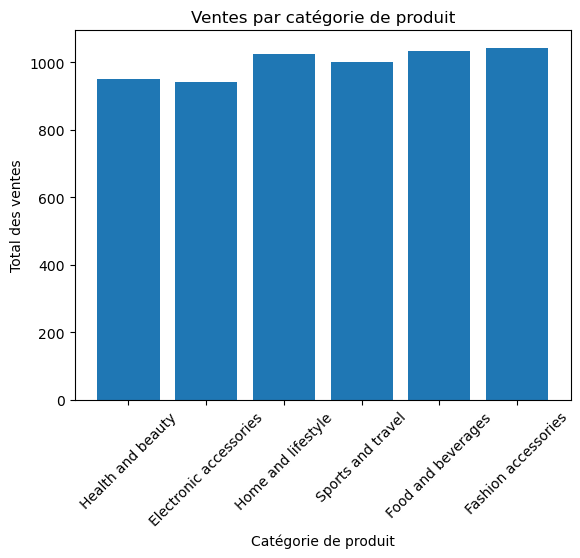

In [23]:
# Diagramme à barres
plt.bar(df['Product line'], df['Total'])
plt.xlabel('Catégorie de produit')
plt.ylabel('Total des ventes')
plt.title('Ventes par catégorie de produit')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Créer un widget de sélection pour la catégorie de produit
select_categorie = widgets.Dropdown(options= df['Product line'].unique(), description='Catégorie de produit:')

# Fonction pour mettre à jour le nuage de points en fonction de la catégorie de produit sélectionnée
def update_scatterplot(categorie):
    df_filtered = df.copy()

    # Filtrer par catégorie de produit
    if categorie != 'Toutes':
        df_filtered = df_filtered[df_filtered['Product line'] == categorie]

    # Créer le nuage de points
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['Unit price'], df_filtered['Quantity'])
    plt.xlabel('Prix unitaire')
    plt.ylabel('Quantité vendue')
    plt.title('Relation entre le prix unitaire et la quantité vendue de la categorie: {}'.format(categorie))

    plt.show()

# Utiliser interact pour mettre à jour le nuage de points de manière dynamique
widgets.interact(update_scatterplot, categorie=select_categorie)

# Afficher le widget de sélection
display(select_categorie)

interactive(children=(Dropdown(description='Catégorie de produit:', options=('Health and beauty', 'Electronic …

Dropdown(description='Catégorie de produit:', options=('Health and beauty', 'Electronic accessories', 'Home an…

In [32]:
# Créer un widget de sélection pour la catégorie de produit
select_categorie = widgets.Dropdown(options=df['Product line'].unique(), description='Catégorie de produit:')

# Fonction pour mettre à jour le diagramme à barres en fonction de la catégorie de produit sélectionnée
def update_barplot(categorie):
    if categorie == 'Toutes':
        df_filtered = df
    else:
        df_filtered = df[df['Product line'] == categorie]

    # Vérifier si df_filtered est vide
    if df_filtered.empty:
        print('Aucune donnée pour la catégorie de produit spécifiée.')
    else:
        # Calculer les quantités d'achats par genre
        achats_par_genre = df_filtered.groupby('Gender')['Quantity'].sum()

        # Créer le diagramme à barres
        plt.figure(figsize=(8, 6))
        achats_par_genre.plot(kind='bar')
        plt.xlabel('Genre')
        plt.ylabel("Quantité d'achats")
        plt.title('Achats par genre - Catégorie {}'.format(categorie))
        plt.xticks(rotation=0)
        plt.show()

# Utiliser interact pour mettre à jour le diagramme à barres de manière dynamique
widgets.interact(update_barplot, categorie=select_categorie)

# Afficher le widget de sélection
#display(select_categorie)

interactive(children=(Dropdown(description='Catégorie de produit:', options=('Health and beauty', 'Electronic …

<function __main__.update_barplot(categorie)>

In [35]:
# Créer un widget de sélection pour la catégorie de produit
select_categorie = widgets.Dropdown(options=df['Product line'].unique(), description='Catégorie de produit:')

# Fonction pour mettre à jour l'histogramme en fonction de la catégorie de produit sélectionnée
def update_histogram(categorie):
    if categorie == 'Toutes':
        df_filtered = df.copy()
    else:
        df_filtered = df[df['Product line'] == categorie]

    # Vérifier si df_filtered est vide
    if df_filtered.empty:
        print('Aucune donnée pour la catégorie de produit spécifiée.')
    else:
        # Créer l'histogramme
        plt.figure(figsize=(8, 6))
        plt.hist(df_filtered['Rating'], bins=10, edgecolor='black')
        plt.xlabel('Note')
        plt.ylabel('Fréquence')
        plt.title('Distribution des notes attribuées par les clients pour la Catégorie: {}'.format(categorie))
        plt.show()

# Utiliser interact pour mettre à jour l'histogramme de manière dynamique
widgets.interact(update_histogram, categorie=select_categorie)


interactive(children=(Dropdown(description='Catégorie de produit:', options=('Health and beauty', 'Electronic …

<function __main__.update_histogram(categorie)>

In [36]:
# Créer des widgets de sélection pour la catégorie de produit et la ville
select_categorie = widgets.Dropdown(options=df['Product line'].unique(), description='Catégorie de produit:')
select_ville = widgets.Dropdown(options=df['City'].unique(), description='Ville:')

# Fonction pour mettre à jour l'histogramme en fonction de la catégorie de produit et de la ville sélectionnées
def update_histogram(categorie, ville):
    if categorie == 'Toutes' and ville == 'Toutes':
        df_filtered = df.copy()
    elif ville == 'Toutes':
        df_filtered = df[df['City'] == ville]
    elif categorie == 'Toutes':
        df_filtered = df[df['Product line'] == categorie]
    else:
        df_filtered = df[(df['Product line'] == categorie) & (df['City'] == ville)]

    # Vérifier si df_filtered est vide
    if df_filtered.empty:
        print('Aucune donnée pour la catégorie de produit et la ville spécifiées.')
    else:
        # Créer l'histogramme
        plt.figure(figsize=(8, 6))
        plt.hist(df_filtered['Rating'], bins=10, edgecolor='black')
        plt.xlabel('Note')
        plt.ylabel('Fréquence')
        plt.title('Distribution des notes attribuées par les clients pour la Catégorie: {} à {}'.format(categorie, ville))
        plt.show()

# Utiliser interact pour mettre à jour l'histogramme de manière dynamique
widgets.interact(update_histogram, categorie=select_categorie, ville=select_ville)

interactive(children=(Dropdown(description='Catégorie de produit:', options=('Health and beauty', 'Electronic …

<function __main__.update_histogram(categorie, ville)>

In [44]:
types_de_paiement = df['Payment'].unique()
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

[Text(0.5, 1.0, 'Type de paiement pour chaque categorie de produit')]

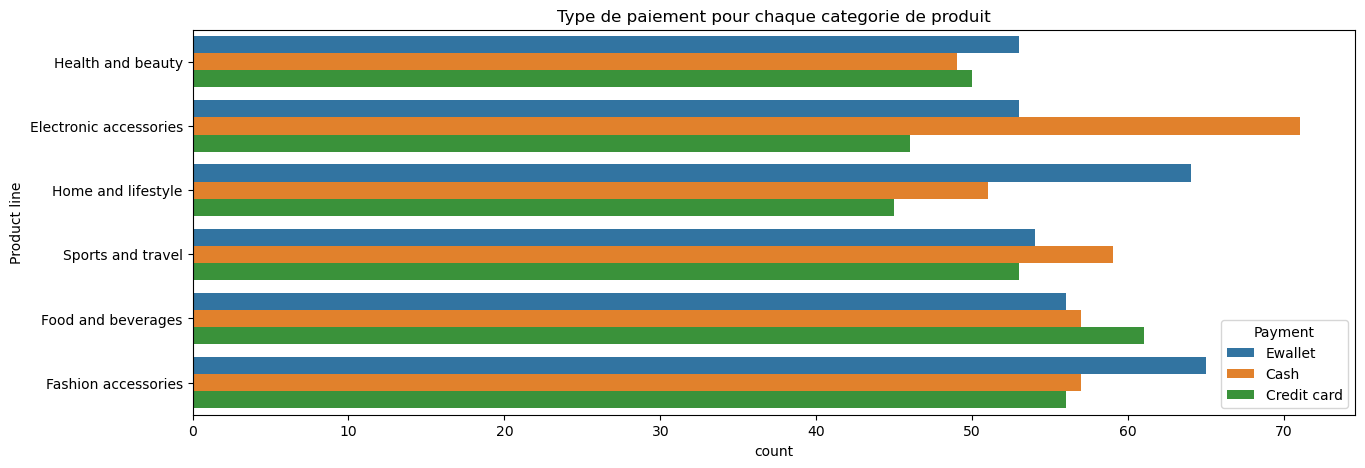

In [41]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= df, hue='Payment').set(title='Type de paiement pour chaque categorie de produit')

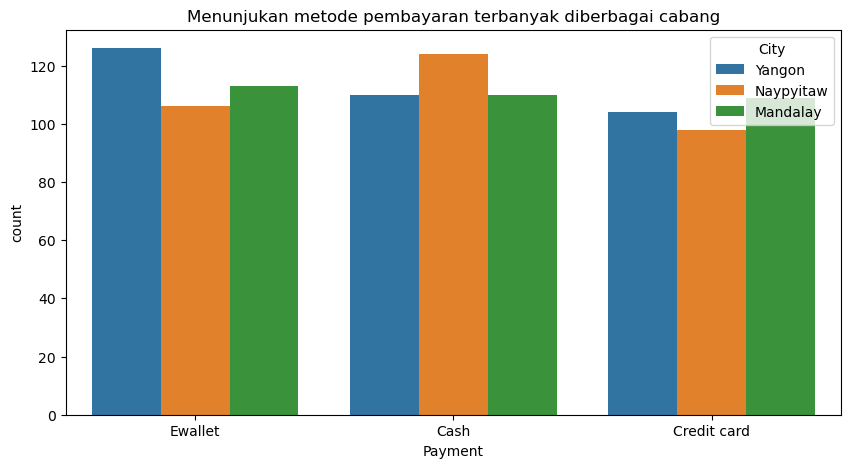

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Payment', data=df, hue='City').set(title='Methode de paiement les plus utilisées dans les différentes villes')

plt.show()  

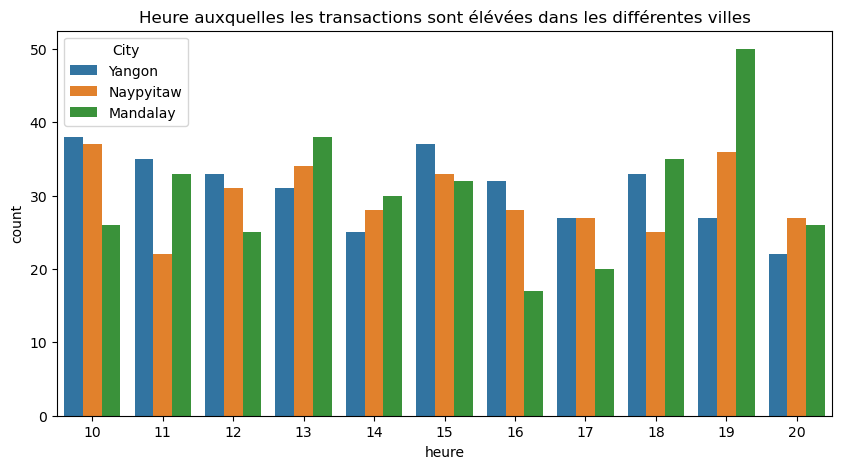

In [51]:
df['Time'] = pd.to_datetime(df['Time'])
df['heure'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
plt.figure(figsize=(10, 5))
sns.countplot(x='heure', data=df, hue='City').set(title='Heure auxquelles les transactions sont élévées dans les différentes villes')

plt.show()

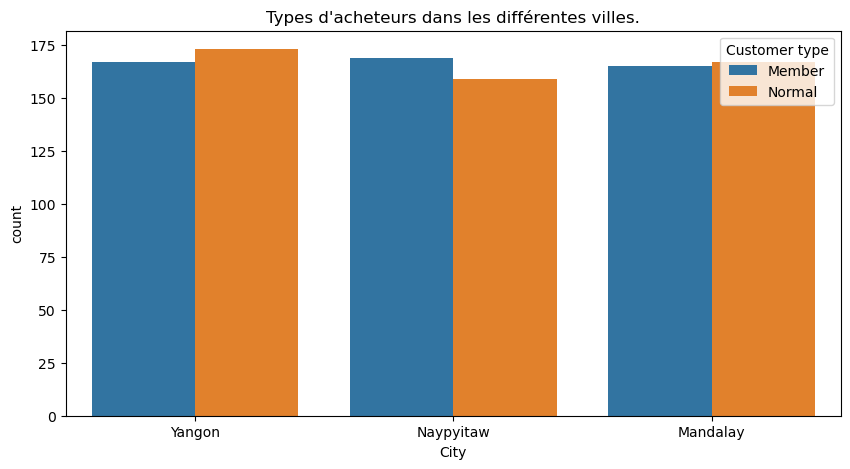

In [53]:
df['Customer type'].value_counts()
plt.figure(figsize= (10,5))
sns.countplot(x='City', data=df, hue='Customer type').set(title='Types d\'acheteurs dans les différentes villes.' )
plt.show()

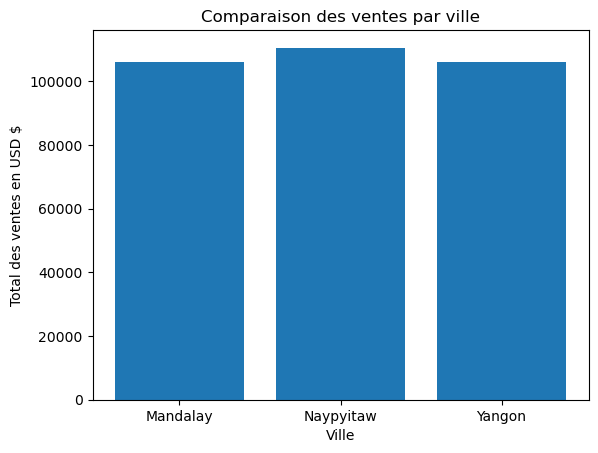

In [65]:
# Grouper les données par ville et calculer le montant total des transactions d'achat
total_sales_by_city = df.groupby('City')['Total'].sum()

# Créer un graphique à barres pour visualiser les résultats
plt.bar(total_sales_by_city.index, total_sales_by_city.values)
plt.xlabel('Ville')
plt.ylabel('Total des ventes en USD $')
plt.title('Comparaison des ventes par ville')

# Afficher le graphique
plt.show()